<a href="https://colab.research.google.com/github/evgeny-kolonsky/IMU/blob/main/janibekov/janibekov-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:57: SyntaxWarning: invalid escape sequence '\o'
<>:58: SyntaxWarning: invalid escape sequence '\o'
<>:59: SyntaxWarning: invalid escape sequence '\o'
<>:57: SyntaxWarning: invalid escape sequence '\o'
<>:58: SyntaxWarning: invalid escape sequence '\o'
<>:59: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1450147106.py:57: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(sol.t, sol.y[4], label='$\omega_x$ (малая)')
/tmp/ipython-input-1450147106.py:58: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(sol.t, sol.y[5], label='$\omega_y$ (средняя)', linewidth=2)
/tmp/ipython-input-1450147106.py:59: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(sol.t, sol.y[6], label='$\omega_z$ (большая)')


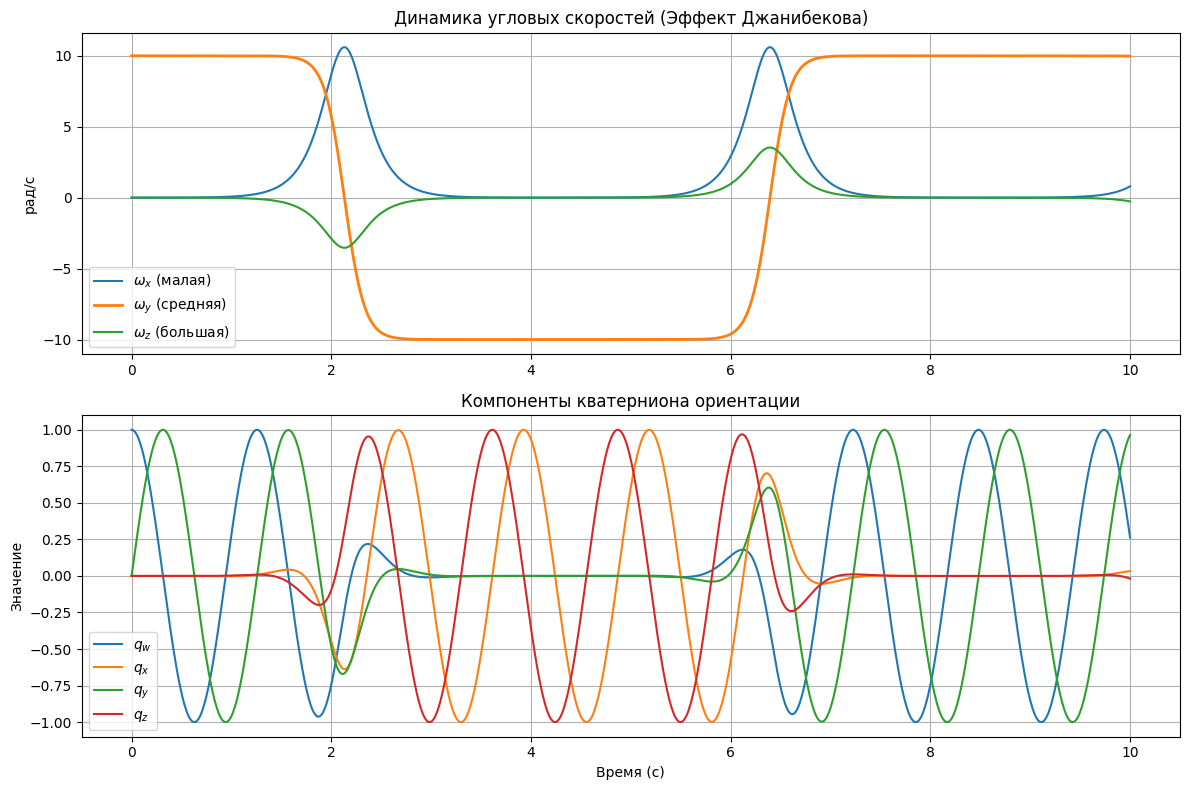

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

def solve_janibekov():
    # 1. Параметры системы
    # Моменты инерции (главные оси): Jx < Jy < Jz
    J = np.array([1.0, 1.5, 3.0])
    invJ = 1.0 / J

    # Начальное состояние:
    # Кватернион (без вращения) [w, x, y, z]
    q0 = [1.0, 0.0, 0.0, 0.0]
    # Угловая скорость: в основном вокруг оси Y (средняя ось)
    # Добавляем крошечное возмущение 0.001 по оси X
    w0 = [0.001, 10.0, 0.0]

    y0 = np.concatenate([q0, w0])

    def dynamics(t, y):
        q = y[:4]
        w = y[4:]

        # Нормировка кватерниона внутри шага для стабильности
        q = q / np.linalg.norm(q)

        # --- Уравнения Эйлера (Динамика) ---
        # dw = J^-1 * (M - w x (J*w)), при M = 0
        dwx = invJ[0] * (J[1] - J[2]) * w[1] * w[2]
        dwy = invJ[1] * (J[2] - J[0]) * w[2] * w[0]
        dwz = invJ[2] * (J[0] - J[1]) * w[0] * w[1]

        # --- Кинематика кватернионов ---
        # dq = 0.5 * q * Omega
        qw, qx, qy, qz = q
        wx, wy, wz = w

        dq = 0.5 * np.array([
            -qx*wx - qy*wy - qz*wz,
             qw*wx + qy*wz - qz*wy,
             qw*wy - qx*wz + qz*wx,
             qw*wz + qx*wy - qy*wx
        ])

        return np.concatenate([dq, [dwx, dwy, dwz]])

    # 2. Интегрирование
    t_span = (0, 10)
    t_eval = np.linspace(0, 10, 1000)
    sol = solve_ivp(dynamics, t_span, y0, t_eval=t_eval, rtol=1e-9, atol=1e-12)

    # 3. Визуализация
    plt.figure(figsize=(12, 8))

    # График угловых скоростей
    plt.subplot(2, 1, 1)
    plt.plot(sol.t, sol.y[4], label='$\omega_x$ (малая)')
    plt.plot(sol.t, sol.y[5], label='$\omega_y$ (средняя)', linewidth=2)
    plt.plot(sol.t, sol.y[6], label='$\omega_z$ (большая)')
    plt.title('Динамика угловых скоростей (Эффект Джанибекова)')
    plt.ylabel('рад/с')
    plt.legend()
    plt.grid(True)

    # График компонент кватерниона
    plt.subplot(2, 1, 2)
    plt.plot(sol.t, sol.y[0], label='$q_w$')
    plt.plot(sol.t, sol.y[1], label='$q_x$')
    plt.plot(sol.t, sol.y[2], label='$q_y$')
    plt.plot(sol.t, sol.y[3], label='$q_z$')
    plt.title('Компоненты кватерниона ориентации')
    plt.xlabel('Время (с)')
    plt.ylabel('Значение')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

solve_janibekov()
